# Sales Prediction: Using Machine Learning Approach

# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection import cross_val_score as CVS
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
import warnings

# Performing EDA

In [2]:
warnings.filterwarnings('ignore')
traindata_df = pd.read_csv(r'C:\Users\aroob\Downloads\traindata (1).csv')
print("printing head of train data ")
print(traindata_df.head().to_string())


printing head of train data 
    Invoice ID Branch       City CustomerType  Gender             ProductLine  Unit price  Quantity   Tax 5%     Total       Date   Time      Payment    cogs  gross margin percentage  GrossIncome  Rating
0  750-67-8428      A     Yangon       Member  Female       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019  13:08      Ewallet  522.83                 4.761905      26.1415     9.1
1  226-31-3081      C  Naypyitaw       Normal  Female  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019  10:29         Cash   76.40                 4.761905       3.8200     9.6
2  631-41-3108      A     Yangon       Normal    Male      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019  13:23  Credit card  324.31                 4.761905      16.2155     7.4
3  123-19-1176      A     Yangon       Member    Male       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019  20:33      Ewallet  465.

In [3]:
testdata_df = pd.read_csv(r'C:\Users\aroob\Downloads\testdata (1).csv')
print("printing head of test data ")
print(testdata_df.head().to_string())

printing head of test data 
    Invoice ID Branch       City CustomerType  Gender          ProductLine  Unit price  Quantity   Tax 5%      Total       Date   Time      Payment    cogs  gross margin percentage  GrossIncome  Rating
0  751-41-9720      C  Naypyitaw       Normal    Male   Home and lifestyle       97.50        10  48.7500  1023.7500  1/12/2019  16:18      Ewallet  975.00                 4.761905      48.7500     8.0
1  626-43-7888      C  Naypyitaw       Normal  Female                  NaN       60.41         8  24.1640   507.4440   2/7/2019  12:23      Ewallet  483.28                 4.761905      24.1640     9.6
2  176-64-7711      B   Mandalay       Normal    Male   Food and beverages       32.32         3   4.8480   101.8080  3/27/2019  19:11  Credit card   96.96                 4.761905       4.8480     4.3
3  191-29-0321      B   Mandalay       Member  Female  Fashion accessories       19.77        10   9.8850   207.5850  2/27/2019  18:57  Credit card  197.70         

In [4]:
print(f"Training Dataset (row, col): {traindata_df.shape}\n\nTesting Dataset (row, col): {testdata_df.shape}")
print(traindata_df.info(null_counts=True))

Training Dataset (row, col): (636, 17)

Testing Dataset (row, col): (301, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               636 non-null    object 
 1   Branch                   636 non-null    object 
 2   City                     636 non-null    object 
 3   CustomerType             636 non-null    object 
 4   Gender                   636 non-null    object 
 5   ProductLine              636 non-null    object 
 6   Unit price               636 non-null    float64
 7   Quantity                 636 non-null    int64  
 8   Tax 5%                   636 non-null    float64
 9   Total                    636 non-null    float64
 10  Date                     636 non-null    object 
 11  Time                     636 non-null    object 
 12  Payment                  636 non-null    object 
 13  co

In [5]:
print("describing train data ")
print(traindata_df.describe().to_string())

describing train data 
       Unit price    Quantity      Tax 5%        Total        cogs  gross margin percentage  GrossIncome      Rating
count  636.000000  636.000000  636.000000   636.000000  636.000000             6.360000e+02   636.000000  636.000000
mean    55.767469    5.455975   15.164634   318.457307  303.292673             4.761905e+00    15.164634    6.971069
std     26.127543    2.896582   11.367685   238.721383  227.353698             4.888826e-14    11.367685    1.713314
min     10.130000    1.000000    0.604500    12.694500   12.090000             4.761905e+00     0.604500    4.000000
25%     33.507500    3.000000    6.353000   133.413000  127.060000             4.761905e+00     6.353000    5.500000
50%     54.850000    5.000000   12.042000   252.882000  240.840000             4.761905e+00    12.042000    7.000000
75%     77.025000    8.000000   22.030000   462.630000  440.600000             4.761905e+00    22.030000    8.425000
max     99.960000   10.000000   49.650000

In [6]:
print("describing test data ")
print(testdata_df.describe().to_string())

describing test data 
       Unit price    Quantity      Tax 5%        Total        cogs  gross margin percentage  GrossIncome      Rating
count  301.000000  301.000000  301.000000   301.000000  301.000000             3.010000e+02   301.000000  301.000000
mean    55.626512    5.491694   15.443879   324.321453  308.877575             4.761905e+00    15.443879    6.904651
std     27.198550    2.945748   12.183733   255.858383  243.674650             8.896575e-15    12.183733    1.730369
min     10.080000    1.000000    0.508500    10.678500   10.170000             4.761905e+00     0.508500    4.000000
25%     32.320000    3.000000    4.768000   100.128000   95.360000             4.761905e+00     4.768000    5.500000
50%     56.000000    6.000000   12.080000   253.680000  241.600000             4.761905e+00    12.080000    6.800000
75%     79.590000    8.000000   22.858500   480.028500  457.170000             4.761905e+00    22.858500    8.500000
max     99.960000   10.000000   48.750000 

In [7]:
# Missing values in ascending order
print("Train Data missing values in ascending order:\n")
print(traindata_df.isnull().sum().sort_values(ascending=True), "\n\n")

Train Data missing values in ascending order:

Invoice ID                 0
gross margin percentage    0
cogs                       0
Payment                    0
Time                       0
Date                       0
Total                      0
GrossIncome                0
Tax 5%                     0
Unit price                 0
ProductLine                0
Gender                     0
CustomerType               0
City                       0
Branch                     0
Quantity                   0
Rating                     0
dtype: int64 




In [8]:
print("Test Data missing values in ascending order:\n")
print(testdata_df.isnull().sum().sort_values(ascending=True), "\n\n")

Test Data missing values in ascending order:

Invoice ID                 0
gross margin percentage    0
cogs                       0
Payment                    0
Time                       0
Date                       0
Total                      0
GrossIncome                0
Tax 5%                     0
Unit price                 0
Gender                     0
CustomerType               0
City                       0
Branch                     0
Quantity                   0
Rating                     0
ProductLine                5
dtype: int64 




In [9]:
# Value count of both categories
print("Branch Count: \n")
print(traindata_df.Branch.value_counts(), "\n\n")

Branch Count: 

A    236
B    232
C    168
Name: Branch, dtype: int64 




In [10]:
print("ProductLine Count: \n")
print(traindata_df.ProductLine.value_counts(), "\n\n")

ProductLine Count: 

Sports and travel         120
Fashion accessories       117
Food and beverages        107
Electronic accessories    102
Home and lifestyle         99
Health and beauty          91
Name: ProductLine, dtype: int64 




In [11]:
# Mode values for both categories in each dataset
print("Branch: \nMode of test values, Mode of train values:\n",
      [testdata_df['Branch'].mode().values[0], traindata_df['Branch'].mode().values[0]])

Branch: 
Mode of test values, Mode of train values:
 ['A', 'A']


In [12]:
print("\nProductLine: \nMode of test values, Mode of train values:\n",
      [testdata_df['ProductLine'].mode().values[0], traindata_df['ProductLine'].mode().values[0]])


ProductLine: 
Mode of test values, Mode of train values:
 ['Electronic accessories', 'Sports and travel']


In [13]:
# Information regarding both datasets
print("Train data information: \n")
print(traindata_df.info())

Train data information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               636 non-null    object 
 1   Branch                   636 non-null    object 
 2   City                     636 non-null    object 
 3   CustomerType             636 non-null    object 
 4   Gender                   636 non-null    object 
 5   ProductLine              636 non-null    object 
 6   Unit price               636 non-null    float64
 7   Quantity                 636 non-null    int64  
 8   Tax 5%                   636 non-null    float64
 9   Total                    636 non-null    float64
 10  Date                     636 non-null    object 
 11  Time                     636 non-null    object 
 12  Payment                  636 non-null    object 
 13  cogs                     636 non-null    float64
 14  

In [14]:
print("\n\nTest data information: \n")
print(testdata_df.info())



Test data information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               301 non-null    object 
 1   Branch                   301 non-null    object 
 2   City                     301 non-null    object 
 3   CustomerType             301 non-null    object 
 4   Gender                   301 non-null    object 
 5   ProductLine              296 non-null    object 
 6   Unit price               301 non-null    float64
 7   Quantity                 301 non-null    int64  
 8   Tax 5%                   301 non-null    float64
 9   Total                    301 non-null    float64
 10  Date                     301 non-null    object 
 11  Time                     301 non-null    object 
 12  Payment                  301 non-null    object 
 13  cogs                     301 non-null    float64
 14 

In [15]:
# list of all the numeric columns
num = traindata_df.select_dtypes('number').columns.to_list()

In [16]:
# list of all the categoric columns
cat = traindata_df.select_dtypes('object').columns.to_list()

In [17]:
# numeric df
BM_num = traindata_df[num]

In [18]:
# categoric df
BM_cat = traindata_df[cat]

In [19]:
print("Print the values in categoric and numeric colums of traindata")
print([traindata_df[cat].value_counts() for category in cat[1:]])

Print the values in categoric and numeric colums of traindata
[Invoice ID   Branch  City       CustomerType  Gender  ProductLine             Date       Time   Payment    
101-17-6199  A       Yangon     Normal        Male    Food and beverages      3/13/2019  19:44  Credit card    1
638-60-7125  A       Yangon     Normal        Female  Electronic accessories  2/14/2019  17:03  Credit card    1
632-90-0281  C       Naypyitaw  Normal        Female  Fashion accessories     3/8/2019   20:01  Credit card    1
633-09-3463  C       Naypyitaw  Normal        Female  Electronic accessories  3/28/2019  12:58  Credit card    1
633-44-8566  A       Yangon     Member        Male    Food and beverages      3/27/2019  20:35  Credit card    1
                                                                                                              ..
370-96-0655  C       Naypyitaw  Normal        Female  Fashion accessories     1/9/2019   13:46  Ewallet        1
371-85-5789  B       Mandalay   Normal

In [20]:
# list of all the numeric columns
num2 = testdata_df.select_dtypes('number').columns.to_list()

In [21]:
# list of all the categoric columns
cat2 = testdata_df.select_dtypes('object').columns.to_list()

In [22]:
# numeric df
BM_num2 = testdata_df[num]

In [23]:
# categoric df
BM_cat2 = testdata_df[cat]

In [24]:
print("Print the values in categoric and numeric colums of traindata")
print([testdata_df[category].value_counts() for category in cat[1:]])

Print the values in categoric and numeric colums of traindata
[A    104
B    100
C     97
Name: Branch, dtype: int64, Yangon       104
Mandalay     100
Naypyitaw     97
Name: City, dtype: int64, Member    155
Normal    146
Name: CustomerType, dtype: int64, Female    157
Male      144
Name: Gender, dtype: int64, Electronic accessories    57
Home and lifestyle        51
Fashion accessories       51
Health and beauty         50
Food and beverages        48
Sports and travel         39
Name: ProductLine, dtype: int64, 3/2/2019     9
1/8/2019     8
1/19/2019    7
2/7/2019     7
1/24/2019    7
            ..
1/21/2019    1
1/16/2019    1
2/23/2019    1
2/10/2019    1
3/12/2019    1
Name: Date, Length: 85, dtype: int64, 11:40    4
10:33    3
14:42    3
10:38    3
12:40    3
        ..
13:23    1
11:27    1
11:12    1
16:36    1
13:28    1
Name: Time, Length: 241, dtype: int64, Ewallet        111
Cash            98
Credit card     92
Name: Payment, dtype: int64]


In [25]:
# train data replacement to make data more uniform
traindata_df['ProductLine'].replace(['H and B', 'Health and beauty'], ['Health And Beauty', 'Health And Beauty'],
                                    inplace=True)

In [26]:
print("Printing product line counts after replacement in train data ")
print(traindata_df.ProductLine.value_counts())

Printing product line counts after replacement in train data 
Sports and travel         120
Fashion accessories       117
Food and beverages        107
Electronic accessories    102
Home and lifestyle         99
Health And Beauty          91
Name: ProductLine, dtype: int64


In [27]:
# test data replacement to make data more uniform
testdata_df['ProductLine'].replace(['H and B', 'Health and beauty'], ['Health And Beauty', 'Health And Beauty'],
                                   inplace=True)

In [28]:
print("Printing product line counts after replacement in test data ")
print(testdata_df.ProductLine.value_counts())

Printing product line counts after replacement in test data 
Electronic accessories    57
Home and lifestyle        51
Fashion accessories       51
Health And Beauty         50
Food and beverages        48
Sports and travel         39
Name: ProductLine, dtype: int64


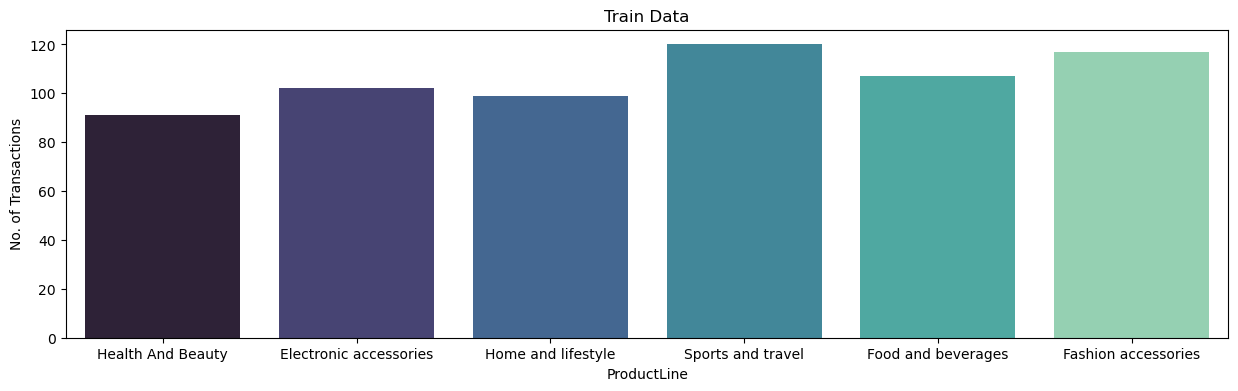

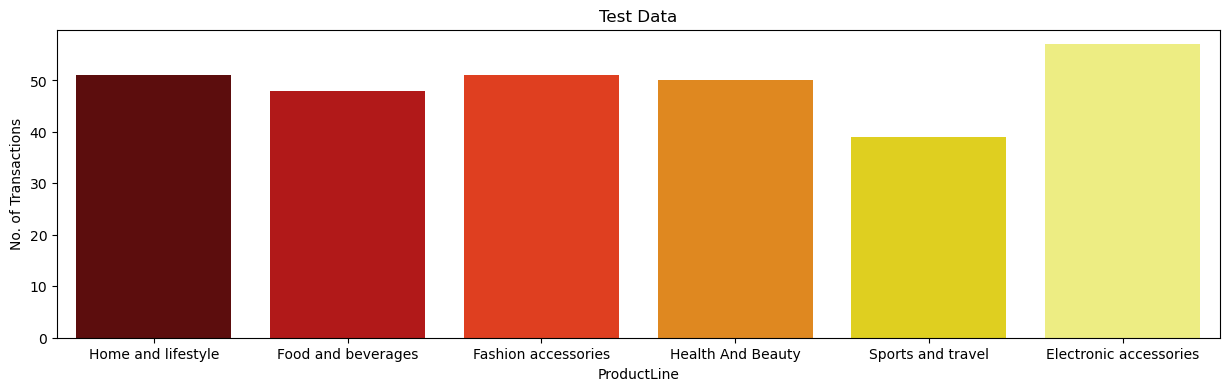

In [29]:
# Total number of transactions for each Product Line
plt.figure(figsize=(15, 4))
sns.countplot(x=traindata_df.ProductLine, data=traindata_df, palette='mako')
plt.ylabel("No. of Transactions")
plt.title("Train Data")
plt.show()
plt.figure(figsize=(15, 4))
sns.countplot(x=testdata_df.ProductLine, data=testdata_df, palette='hot')
plt.ylabel("No. of Transactions")
plt.title("Test Data")
plt.show()

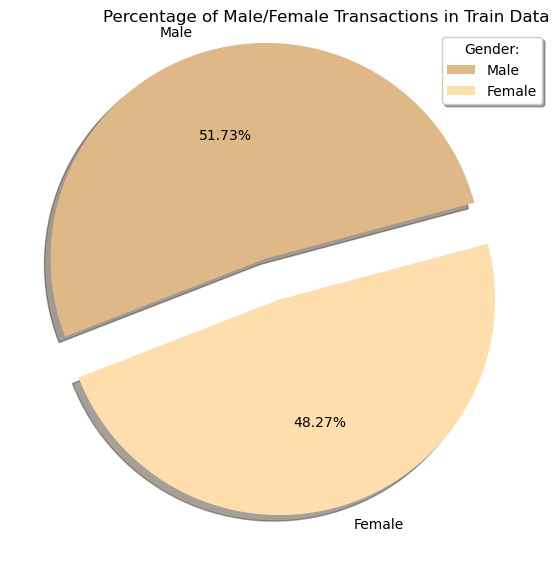

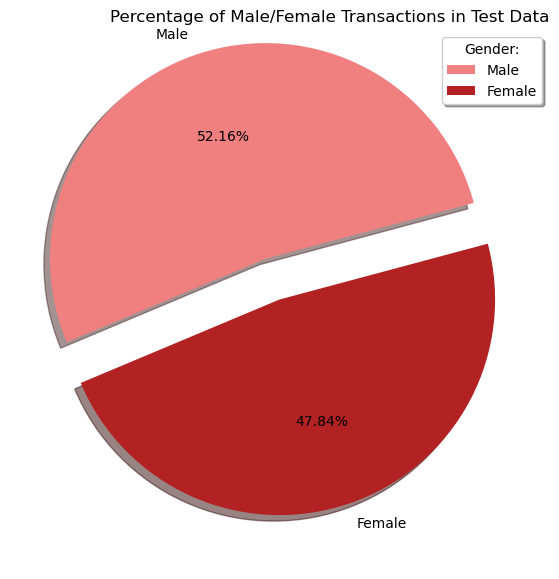

In [30]:
# Percentage of Male/Female making the transactions
plt.figure(figsize=(25, 7))
plt.pie(traindata_df.Gender.value_counts(), labels=["Male", "Female"], shadow=True, colors=['burlywood', 'navajowhite'],
        startangle=15, explode=[0.2, 0], autopct='%1.2f%%')
plt.legend(traindata_df.Gender, labels=["Male", "Female"], shadow=True, title="Gender:", loc=1)
plt.title("Percentage of Male/Female Transactions in Train Data", loc="right")
plt.show()
plt.figure(figsize=(25, 7))
plt.pie(testdata_df.Gender.value_counts(), labels=["Male", "Female"], shadow=True, colors=['lightcoral', 'firebrick'],
        startangle=15, explode=[0.2, 0], autopct='%1.2f%%')
plt.legend(testdata_df.Gender, labels=["Male", "Female"], shadow=True, title="Gender:", loc=1)
plt.title("Percentage of Male/Female Transactions in Test Data", loc="right")
plt.show()

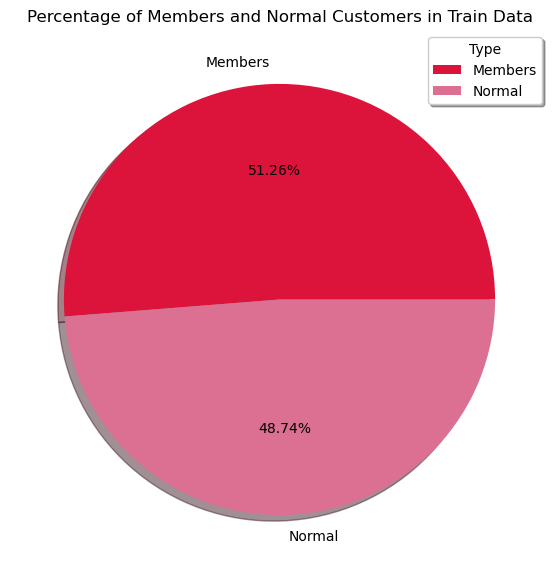

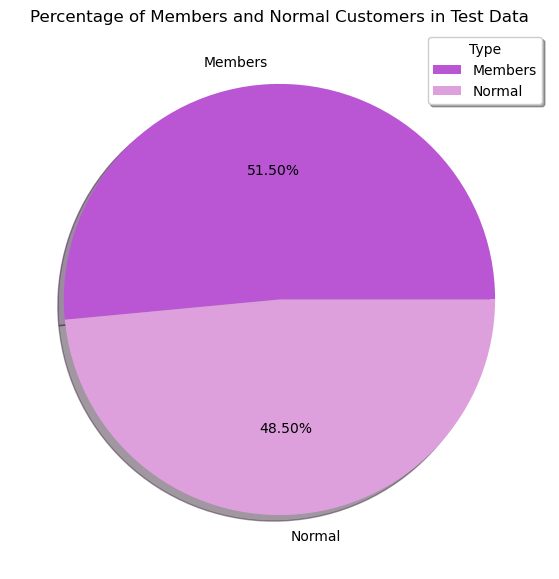

In [31]:
# Percentage of members and normal Customer Type
plt.figure(figsize=(25, 7))
plt.pie(traindata_df.CustomerType.value_counts(), labels=["Members", "Normal"], shadow=True,
        colors=['crimson', 'palevioletred'], autopct='%1.2f%%')
plt.legend(traindata_df.Gender, labels=["Members", "Normal"], shadow=True, title="Type", loc=1)
plt.title("Percentage of Members and Normal Customers in Train Data")
plt.show()
plt.figure(figsize=(25, 7))
plt.pie(testdata_df.CustomerType.value_counts(), labels=["Members", "Normal"], shadow=True,
        colors=['mediumorchid', 'plum'], autopct='%1.2f%%')
plt.legend(testdata_df.Gender, labels=["Members", "Normal"], shadow=True, title="Type", loc=1)
plt.title("Percentage of Members and Normal Customers in Test Data")
plt.show()

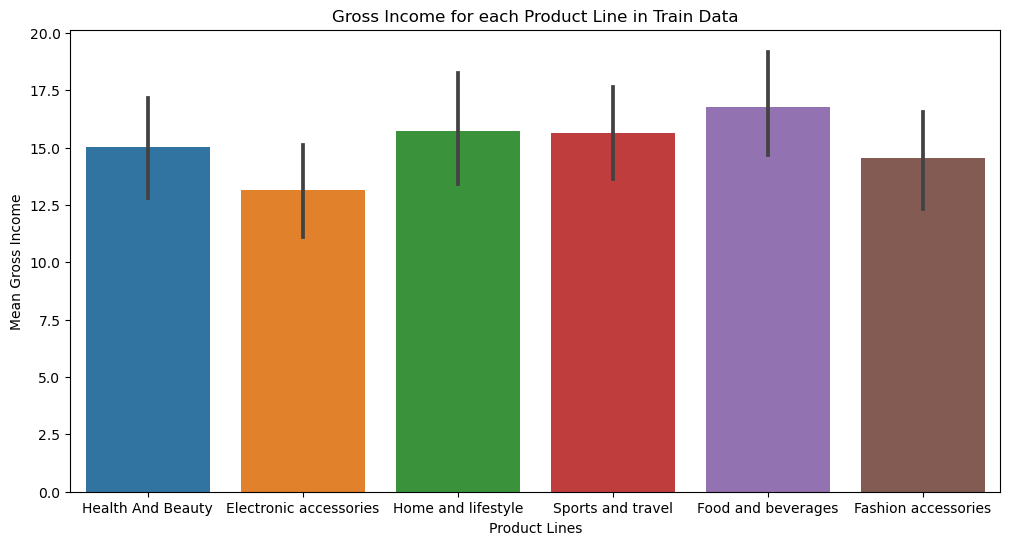

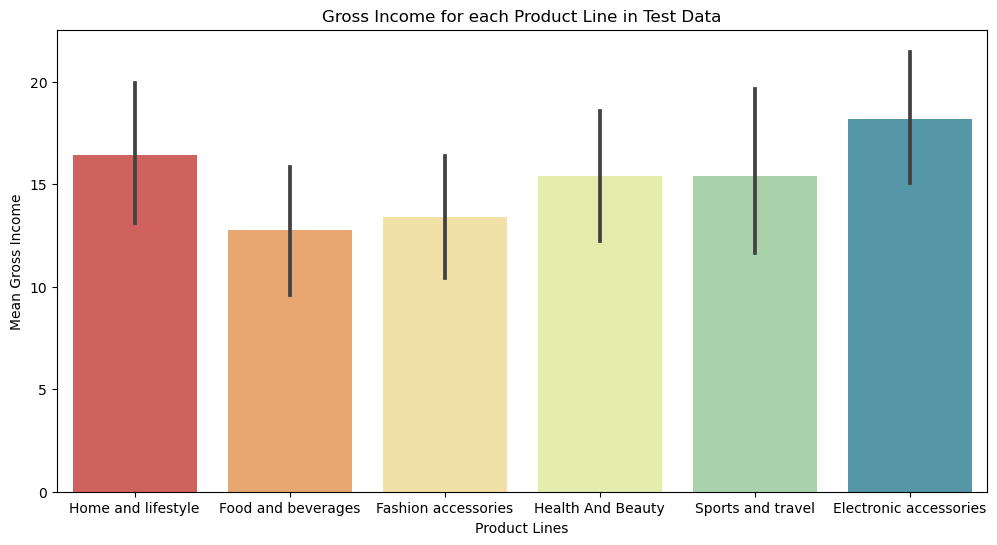

In [32]:
# Mean Gross income for each Product Line
plt.figure(figsize=(12, 6))
sns.barplot(x=traindata_df['ProductLine'], y=traindata_df['GrossIncome'])
plt.xlabel("Product Lines")
plt.ylabel("Mean Gross Income")
plt.title("Gross Income for each Product Line in Train Data")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=testdata_df['ProductLine'], y=testdata_df['GrossIncome'], palette='Spectral')
plt.title("Gross Income for each Product Line in Test Data")
plt.xlabel("Product Lines")
plt.ylabel("Mean Gross Income")
plt.show()

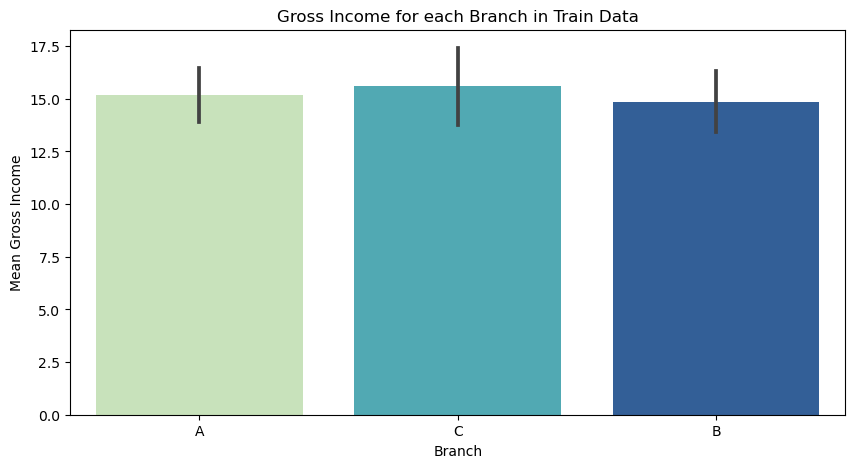

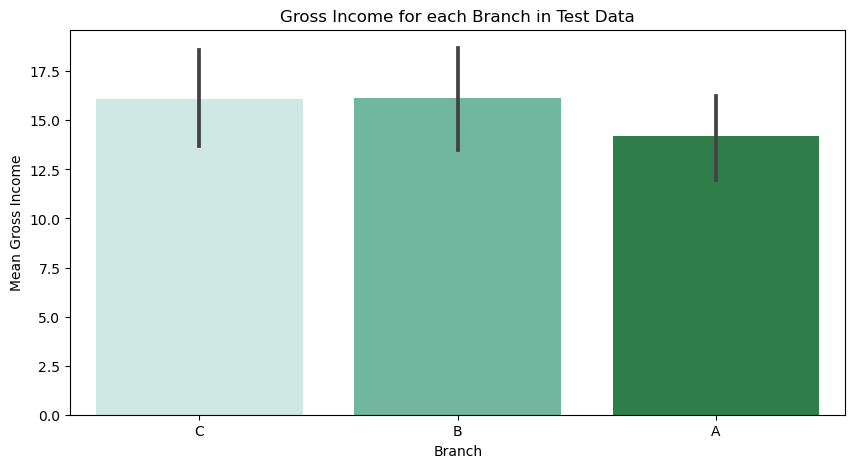

In [33]:
# Mean Gross Income for every Branch
plt.figure(figsize=(10, 5))
sns.barplot(x=traindata_df['Branch'], y=traindata_df['GrossIncome'], palette='YlGnBu')
plt.xlabel("Branch")
plt.ylabel("Mean Gross Income")
plt.title("Gross Income for each Branch in Train Data")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=testdata_df['Branch'], y=testdata_df['GrossIncome'], palette='BuGn')
plt.title("Gross Income for each Branch in Test Data")
plt.xlabel("Branch")
plt.ylabel("Mean Gross Income")
plt.show()

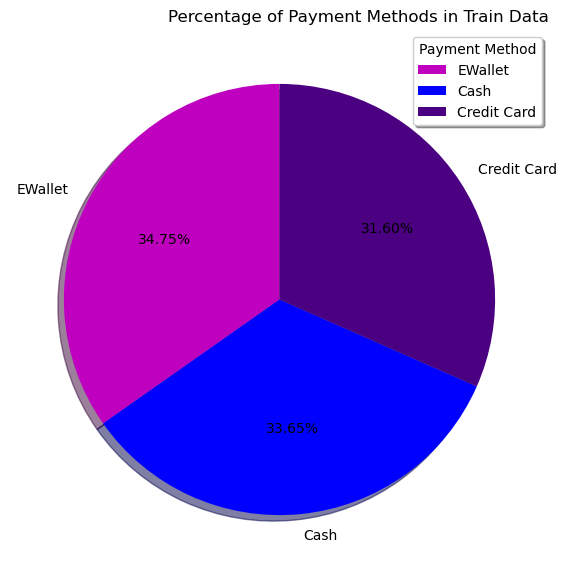

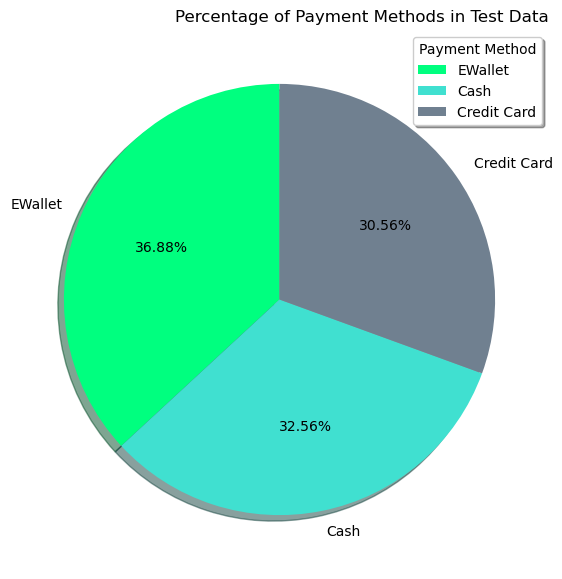

In [34]:
# Percentage Composition of Payment Methods in the transactions
plt.figure(figsize=(25, 7))
plt.pie(traindata_df.Payment.value_counts(), labels=["EWallet", "Cash", "Credit Card"], shadow=True,
        colors=["m", 'b', 'indigo'], startangle=90, autopct='%1.2f%%')
plt.legend(traindata_df.Payment.value_counts(), labels=["EWallet", "Cash", "Credit Card"], shadow=True,
           title="Payment Method", loc=1)
plt.title("Percentage of Payment Methods in Train Data", loc="right")
plt.show()
plt.figure(figsize=(25, 7))
plt.pie(testdata_df.Payment.value_counts(), labels=["EWallet", "Cash", "Credit Card"], shadow=True,
        colors=['springgreen', 'turquoise', 'slategray'], startangle=90, autopct='%1.2f%%')
plt.legend(testdata_df.Payment.value_counts(), labels=["EWallet", "Cash", "Credit Card"], shadow=True,
           title="Payment Method", loc=1)
plt.title("Percentage of Payment Methods in Test Data", loc="right")
plt.show()

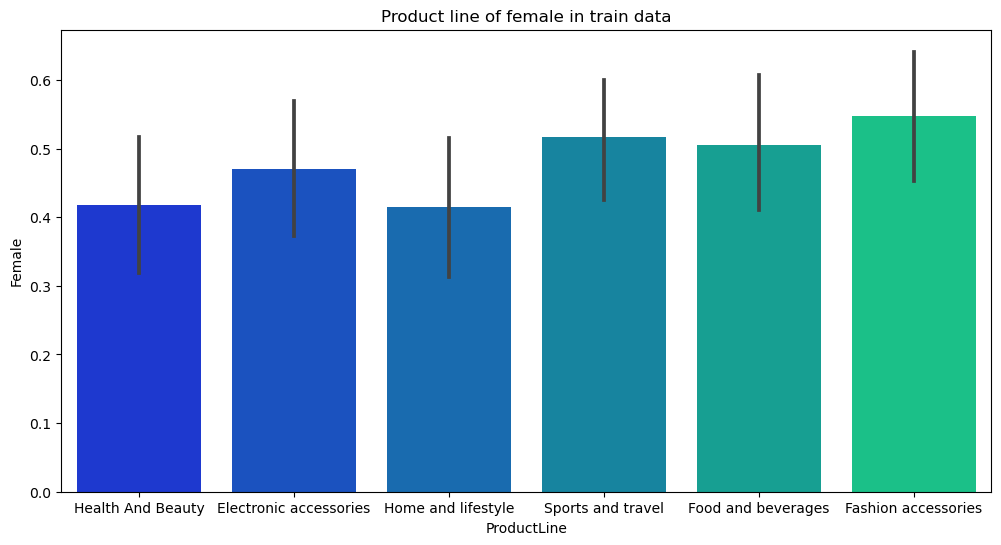

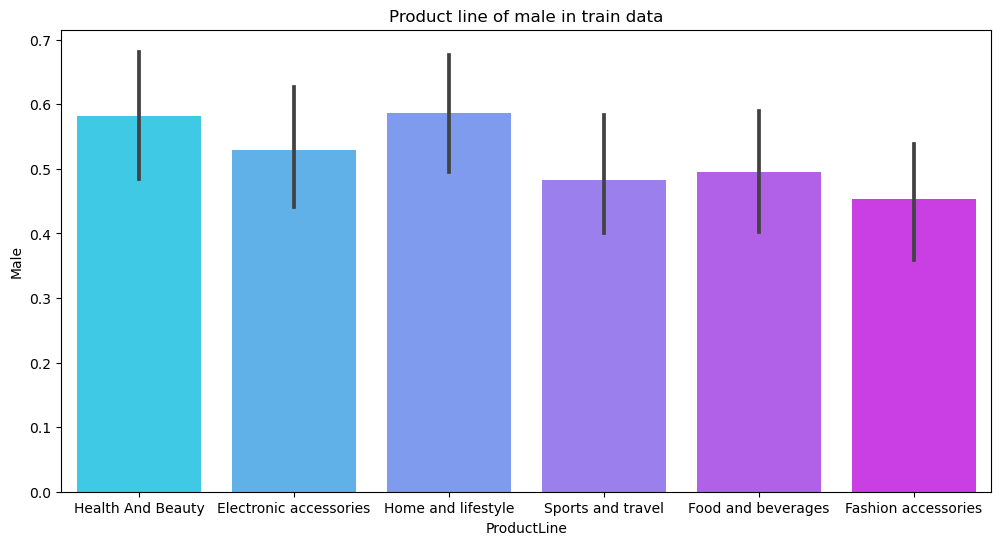

In [35]:
#  Composition Ratio of Gender for every Product Line in Train Data
gender_dummies = pd.get_dummies(traindata_df['Gender'])
gender_dummies.head()
df = pd.concat([traindata_df, gender_dummies], axis=1)

plt.figure(figsize=(12, 6))
sns.barplot(x='ProductLine', y='Female', data=df, palette='winter')
plt.title("Product line of female in train data")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='ProductLine', y='Male', data=df, palette='cool')
plt.title("Product line of male in train data")
plt.show()

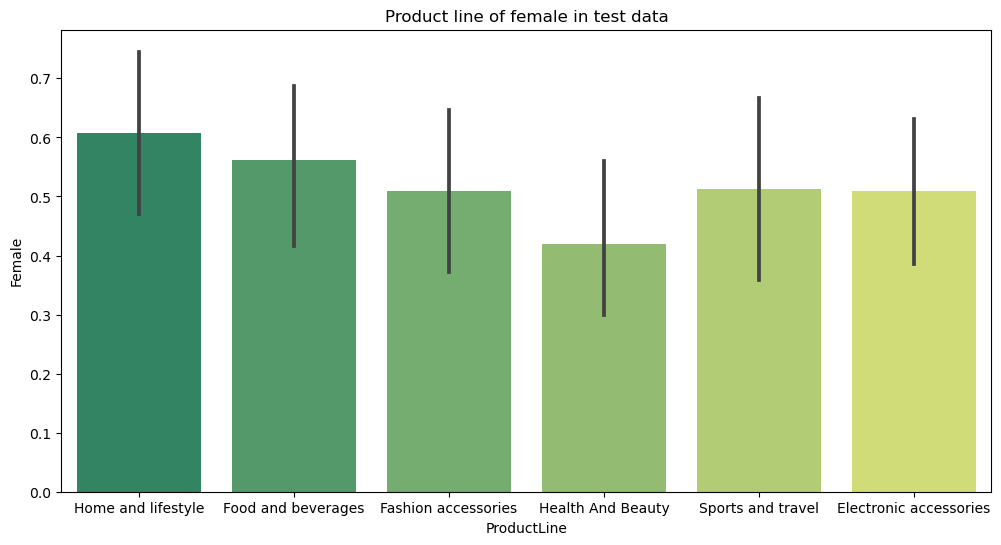

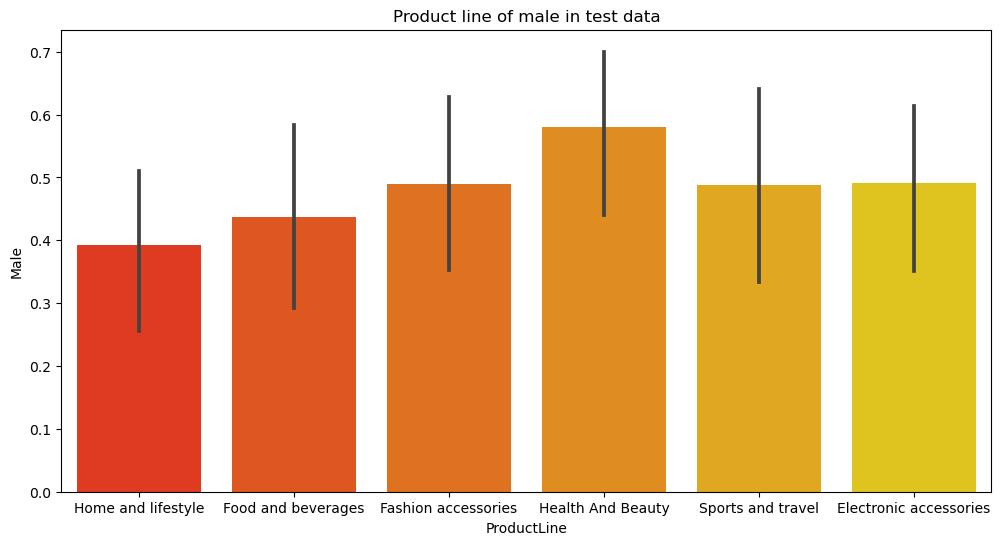

In [36]:
#  Composition Ratio of Gender for every Product Line in Test Data
gender_dummies = pd.get_dummies(testdata_df['Gender'])
gender_dummies.head()
df = pd.concat([testdata_df, gender_dummies], axis=1)

plt.figure(figsize=(12, 6))
sns.barplot(x='ProductLine', y='Female', data=df, palette='summer')
plt.title("Product line of female in test data")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='ProductLine', y='Male', data=df, palette='autumn')
plt.title("Product line of male in test data")
plt.show()

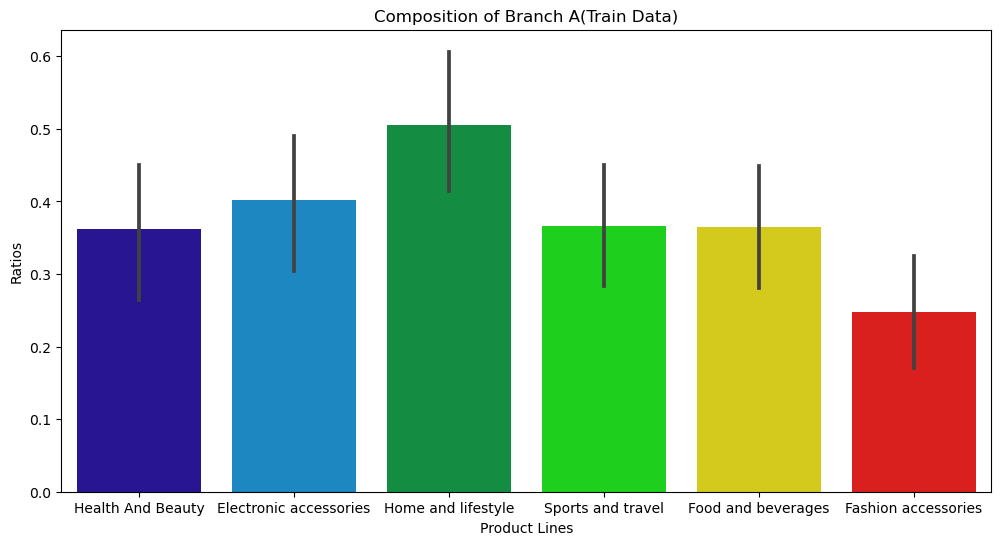

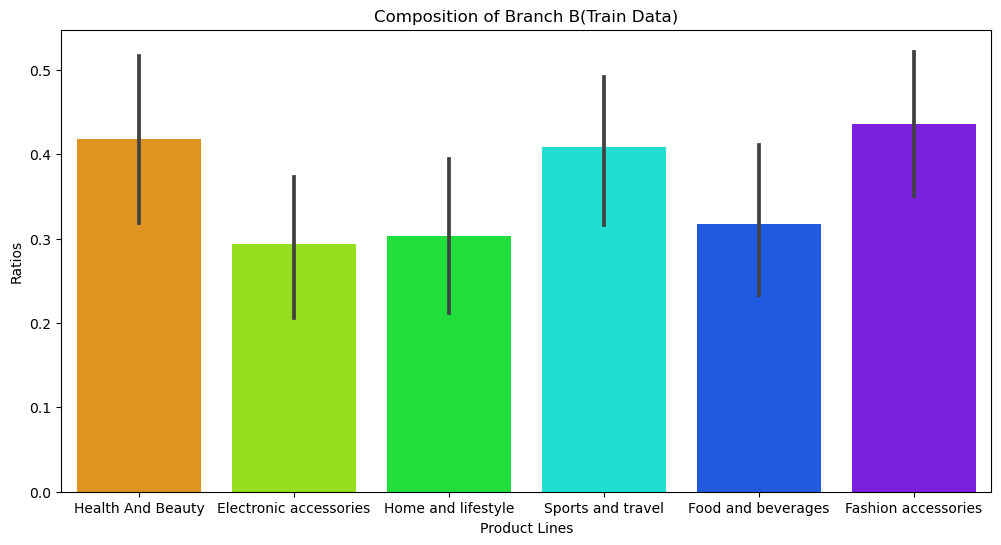

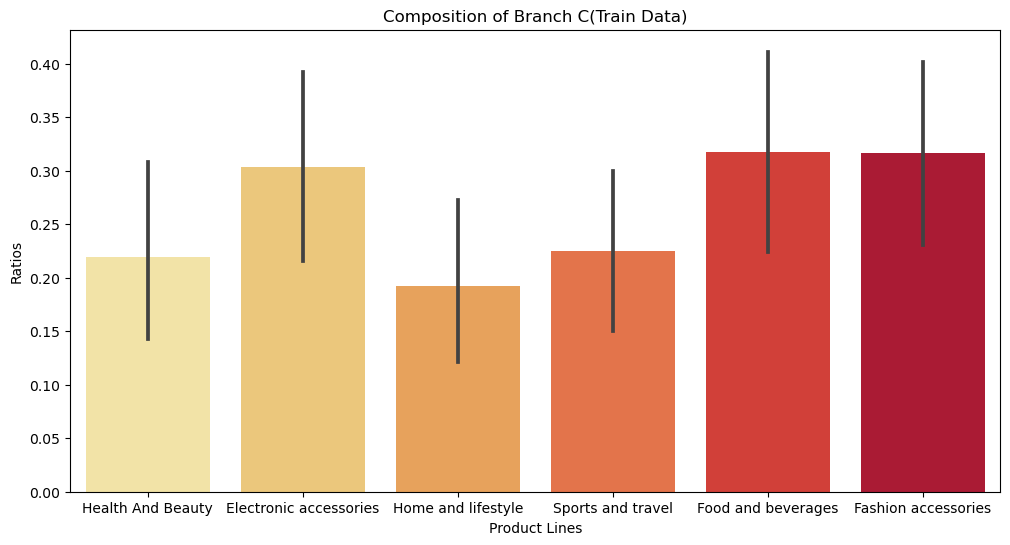

In [37]:
#  Composition Ratio of each Branch for every Product Line in Train Data
branch_dummies = pd.get_dummies(traindata_df['Branch'])
branch_dummies.head()
df = pd.concat([traindata_df, branch_dummies], axis=1)
plt.figure(figsize=(12, 6))
sns.barplot(x='ProductLine', y='A', data=df, palette='nipy_spectral')
plt.title("Composition of Branch A(Train Data)")
plt.xlabel("Product Lines")
plt.ylabel("Ratios")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='ProductLine', y='B', data=df, palette='gist_rainbow')
plt.title("Composition of Branch B(Train Data)")
plt.xlabel("Product Lines")
plt.ylabel("Ratios")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='ProductLine', y='C', data=df, palette='YlOrRd')
plt.title("Composition of Branch C(Train Data)")
plt.xlabel("Product Lines")
plt.ylabel("Ratios")
plt.show()

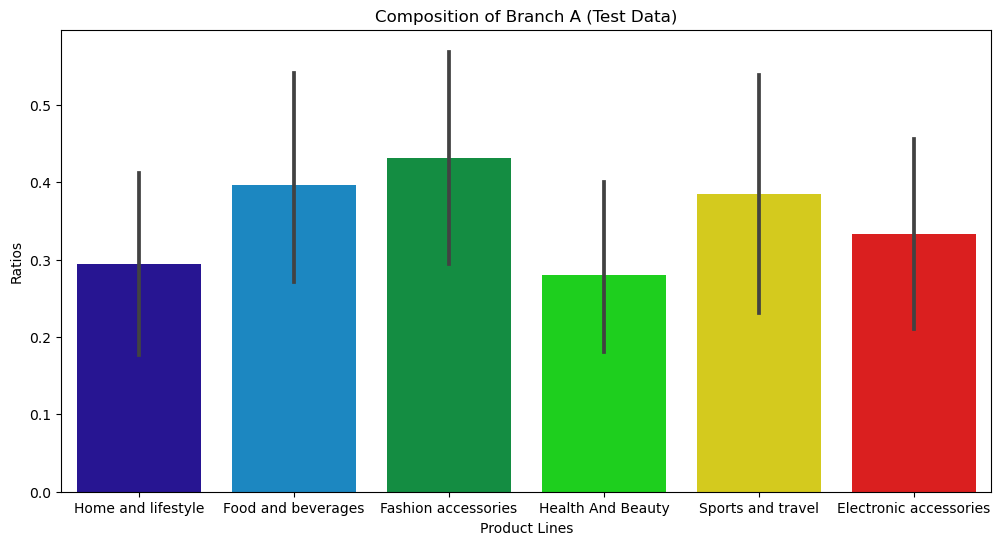

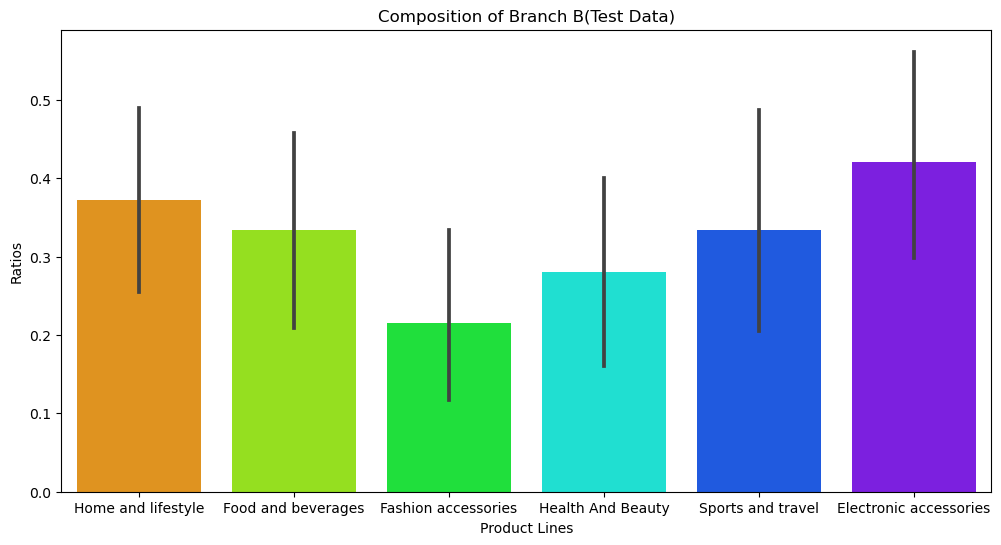

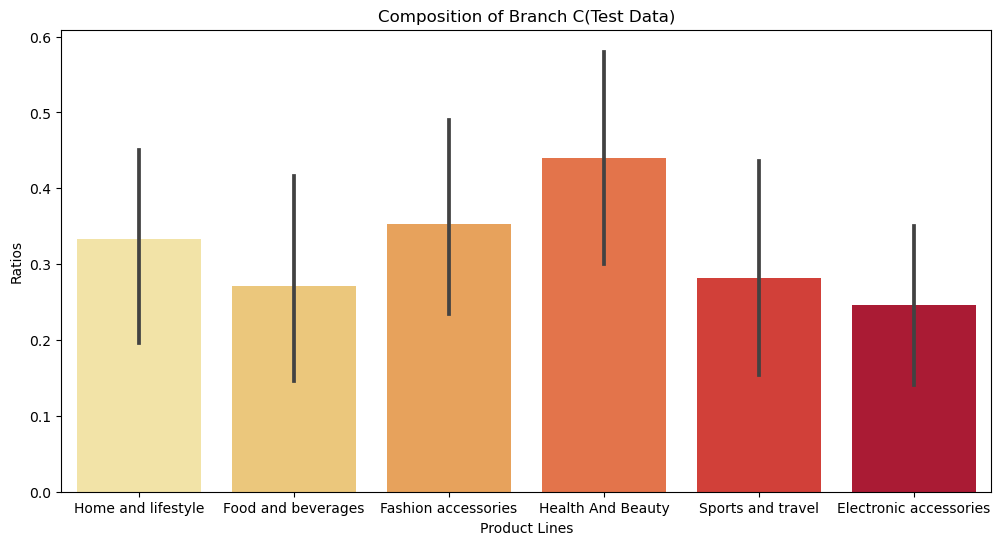

In [38]:
#  Composition Ratio of each Branch for every Product Line in Test Data
branch_dummies = pd.get_dummies(testdata_df['Branch'])
branch_dummies.head()
df = pd.concat([testdata_df, branch_dummies], axis=1)
plt.figure(figsize=(12, 6))
sns.barplot(x='ProductLine', y='A', data=df, palette='nipy_spectral')
plt.title("Composition of Branch A (Test Data)")
plt.xlabel("Product Lines")
plt.ylabel("Ratios")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='ProductLine', y='B', data=df, palette='gist_rainbow')
plt.title("Composition of Branch B(Test Data)")
plt.xlabel("Product Lines")
plt.ylabel("Ratios")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='ProductLine', y='C', data=df, palette='YlOrRd')
plt.title("Composition of Branch C(Test Data)")
plt.xlabel("Product Lines")
plt.ylabel("Ratios")
plt.show()

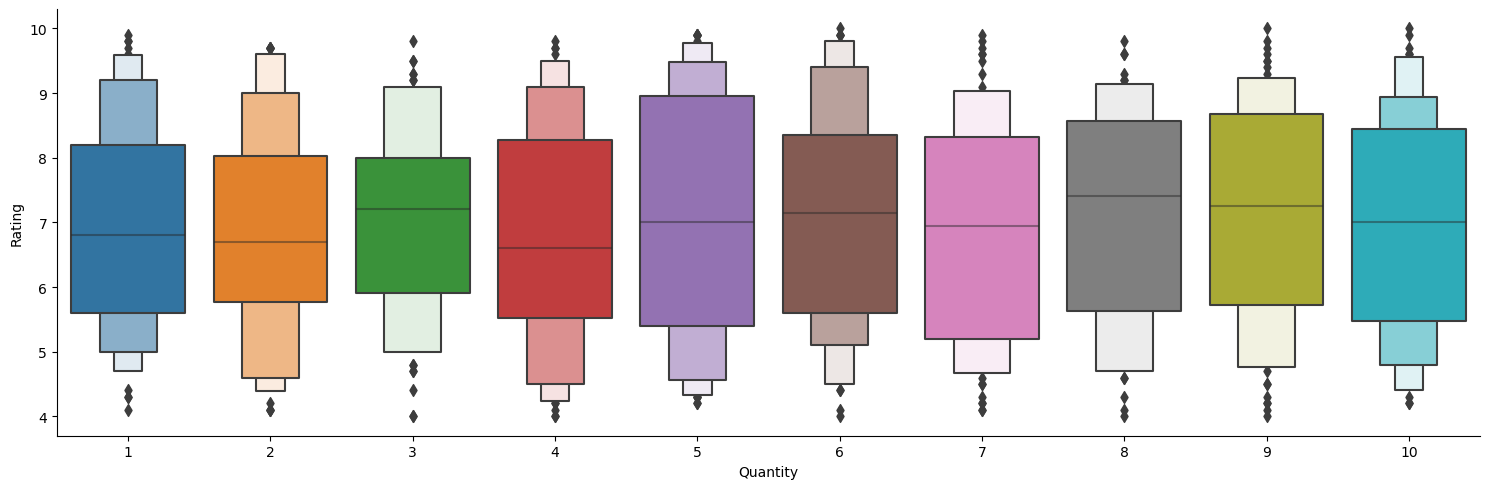

In [39]:
sns.catplot(y='Rating', x='Quantity', data=traindata_df, kind='boxen', aspect=3)
plt.xlabel('Quantity')
plt.ylabel('Rating')
plt.show()

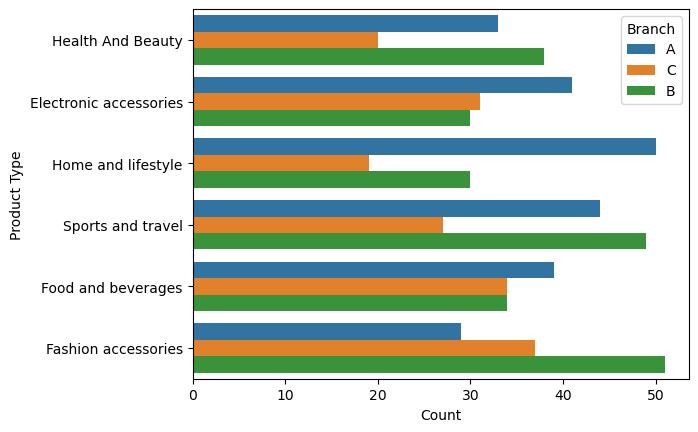

In [40]:
# Finding Which Branch has better sale for a particular product type
plt.figure(dpi=100)
sns.countplot(y='ProductLine', hue="Branch", data=traindata_df)
plt.xlabel('Count')
plt.ylabel('Product Type')
plt.show()

In [41]:
# MachineLearning
# load data
data = pd.read_csv(r'C:\Users\aroob\Downloads\completedata (1).csv')
print(data.head().to_string())

    Invoice ID Branch       City CustomerType  Gender             ProductLine  Unit price  Quantity   Tax 5%     Total       Date   Time      Payment    cogs  gross margin percentage  GrossIncome  Rating
0  750-67-8428      A     Yangon       Member  Female       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019  13:08      Ewallet  522.83                 4.761905      26.1415     9.1
1  226-31-3081      C  Naypyitaw       Normal  Female  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019  10:29         Cash   76.40                 4.761905       3.8200     9.6
2  631-41-3108      A     Yangon       Normal    Male      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019  13:23  Credit card  324.31                 4.761905      16.2155     7.4
3  123-19-1176      A     Yangon       Member    Male       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019  20:33      Ewallet  465.76                 4.761905  

In [42]:
# label encoding
le = LabelEncoder()
Label = ['CustomerType', 'Gender', 'Payment']
for i in Label:
    data[i] = le.fit_transform(data[i])
print(data.head().to_string())

    Invoice ID Branch       City  CustomerType  Gender             ProductLine  Unit price  Quantity   Tax 5%     Total       Date   Time  Payment    cogs  gross margin percentage  GrossIncome  Rating
0  750-67-8428      A     Yangon             0       0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019  13:08        2  522.83                 4.761905      26.1415     9.1
1  226-31-3081      C  Naypyitaw             1       0  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019  10:29        0   76.40                 4.761905       3.8200     9.6
2  631-41-3108      A     Yangon             1       1      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019  13:23        1  324.31                 4.761905      16.2155     7.4
3  123-19-1176      A     Yangon             0       1       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019  20:33        2  465.76                 4.761905      23.2880    

In [43]:
# one hot encoding
cols = ['Branch', 'City', 'ProductLine']
# Apply one-hot encoder
OH_encoder = OneHotEncoder(sparse=False)
data_oh = pd.DataFrame(OH_encoder.fit_transform(data[cols])).astype('int64')

In [44]:
# get feature columns
data_oh.columns = OH_encoder.get_feature_names_out(cols)

In [45]:
# One-hot encoding removed index; put it back
data_oh.index = data.index

In [46]:
# Add one-hot encoded columns to our main df new name: tr_fe, te_fe (means feature engineered )
data_fe = pd.concat([data, data_oh], axis=1)

In [47]:
# Dropping irrelevant columns

data_fe = data_fe.drop(
    ['Invoice ID', 'Branch', 'City', 'ProductLine', 'Tax 5%', 'Date', 'Time', 'Rating', 'Total', 'cogs',
     'gross margin percentage'], axis=1)
print(data_fe.head())

   CustomerType  Gender  Unit price  Quantity  Payment  GrossIncome  Branch_A  \
0             0       0       74.69         7        2      26.1415         1   
1             1       0       15.28         5        0       3.8200         0   
2             1       1       46.33         7        1      16.2155         1   
3             0       1       58.22         8        2      23.2880         1   
4             1       1       86.31         7        2      30.2085         1   

   Branch_B  Branch_C  City_Mandalay  City_Naypyitaw  City_Yangon  \
0         0         0              0               0            1   
1         0         1              0               1            0   
2         0         0              0               0            1   
3         0         0              0               0            1   
4         0         0              0               0            1   

   ProductLine_Electronic accessories  ProductLine_Fashion accessories  \
0                       

In [48]:
# LinearRegression
y = data_fe['Quantity']

In [49]:
X = data_fe.drop('Quantity', axis=1)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [51]:
# model
LR = LinearRegression()

In [52]:
# fit
LR.fit(X_train, y_train)

LinearRegression()

In [53]:
# predict
y_predict = LR.predict(X_test)
y_predict

array([ 6.55828847,  7.9286049 ,  4.05633021,  5.65529185,  2.92904483,
        6.20718478,  1.01260167,  5.26675823,  6.41850849,  4.8816264 ,
        2.29487896,  5.83106551,  5.4659609 , -0.40528738,  4.15291733,
        8.65600607, 10.98733938,  7.15997378, 10.23755277,  6.51526143,
        9.48711821,  7.65633472,  6.09029748,  1.85673355,  5.7337463 ,
        3.26965913,  3.59067093,  5.84314504, 10.57391353,  5.38923724,
        3.05680127,  6.05157447,  9.95733298,  2.37741465,  4.21825828,
        7.12247951,  5.87591184,  8.12921579,  2.863286  , 10.3641157 ,
        1.2577772 , 11.81445653,  9.9070841 ,  9.20731586,  7.64647927,
        6.86166384,  5.11249017, 11.37466118,  4.61126387,  5.3040471 ,
        4.25053334,  5.17307556,  4.59130499,  5.86375041,  5.93847173,
        0.66895376,  6.5380451 ,  5.09994309,  7.80662134,  4.54130083,
        7.1321375 ,  8.07588345,  9.97952251,  6.81048635,  4.62281761,
        3.19940199,  1.96997298,  8.6269625 ,  4.72292769,  4.06

In [54]:
lr_train_acc = LR.score(X_train, y_train)
lr_test_acc  = LR.score(X_test, y_predict)

In [55]:
print("Training Accuracy Of Linear Regression: ",lr_train_acc )

Training Accuracy Of Linear Regression:  0.8143357706622013


In [56]:
# score variables
LR_MAE = round(MAE(y_test, y_predict), 2)
LR_MSE = round(MSE(y_test, y_predict), 2)
LR_R_2 = round(R2(y_test, y_predict), 4)
LR_CS = round(CVS(LR, X, y, cv=5).mean(), 4)

print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Mean Squared Error: {LR_MSE}\n")
print(f" R^2 Score: {LR_R_2 * 100}%\n")

 Mean Absolute Error: 0.9

 Mean Squared Error: 1.5

 R^2 Score: 82.04%



In [57]:
def cross_val(model_name, model, X, y, cv):
    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for a in scores:
        print(round(a * 100, 2), "%")
    print(f'Average {model_name} score: {round(scores.mean() * 100, 4)} %')

In [58]:
cross_val(LR, LinearRegression(), X, y, 5)

MAE = [LR_MAE]
MSE = [LR_MSE]
R_2 = [LR_R_2]
Cross_score = [LR_CS]

Models = pd.DataFrame({
    'models': ["Linear Regression"],
    'MAE': MAE, 'MSE': MSE, 'R^2': R_2, 'Cross Validation Score': Cross_score})
Models.sort_values(by='MAE', ascending=True)

LinearRegression() Scores:
81.27 %
77.72 %
80.15 %
84.4 %
80.76 %
Average LinearRegression() score: 80.8578 %


,models,MAE,MSE,R^2,Cross Validation Score
0,Linear Regression,0.9,1.5,0.8204,0.8086


In [59]:
# Kmeans Clustering
# standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_fe)

In [60]:
pd.DataFrame(data_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.998002,-0.998002,0.718160,0.509930,1.203528,0.919607,1.393261,-0.704987,-0.698638,-0.704987,-0.698638,1.393261,-0.450965,-0.463753,-0.457373,2.371185,-0.434811,-0.44614,-0.070888
1,1.002002,-0.998002,-1.525303,-0.174540,-1.205937,-0.987730,-0.717741,-0.704987,1.431356,-0.704987,1.431356,-0.717741,2.217467,-0.463753,-0.457373,-0.421730,-0.434811,-0.44614,-0.070888
2,1.002002,1.002002,-0.352781,0.509930,-0.001205,0.071446,1.393261,-0.704987,-0.698638,-0.704987,-0.698638,1.393261,-0.450965,-0.463753,-0.457373,-0.421730,2.299850,-0.44614,-0.070888
3,-0.998002,1.002002,0.096214,0.852165,1.203528,0.675780,1.393261,-0.704987,-0.698638,-0.704987,-0.698638,1.393261,-0.450965,-0.463753,-0.457373,2.371185,-0.434811,-0.44614,-0.070888
4,1.002002,1.002002,1.156959,0.509930,1.203528,1.267125,1.393261,-0.704987,-0.698638,-0.704987,-0.698638,1.393261,-0.450965,-0.463753,-0.457373,-0.421730,-0.434811,2.24145,-0.070888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.002002,1.002002,-0.578600,-1.543480,1.203528,-1.141750,-0.717741,-0.704987,1.431356,-0.704987,1.431356,-0.717741,-0.450965,-0.463753,-0.457373,2.371185,-0.434811,-0.44614,-0.070888
996,1.002002,-0.998002,1.574989,1.536635,1.203528,2.846340,-0.717741,1.418467,-0.698638,1.418467,-0.698638,-0.717741,-0.450965,-0.463753,-0.457373,-0.421730,2.299850,-0.44614,-0.070888
997,-0.998002,1.002002,-0.899958,-1.543480,-1.205937,-1.178109,1.393261,-0.704987,-0.698638,-0.704987,-0.698638,1.393261,-0.450965,-0.463753,2.186400,-0.421730,-0.434811,-0.44614,-0.070888
998,1.002002,1.002002,0.383208,-1.543480,-1.205937,-1.032932,1.393261,-0.704987,-0.698638,-0.704987,-0.698638,1.393261,-0.450965,-0.463753,-0.457373,-0.421730,2.299850,-0.44614,-0.070888


In [61]:
# statistics of scaled data
print(pd.DataFrame(data_scaled).describe().to_string())

                 0             1             2             3             4             5             6             7             8             9             10            11            12            13            14            15            16            17            18
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03
mean  -1.065814e-17  5.151435e-17 -1.065814e-16  6.394885e-17  1.314504e-16  1.243450e-16 -1.048051e-16 -2.131628e-17 -1.136868e-16 -2.131628e-17 -1.136868e-16 -1.048051e-16 -9.769963e-18  6.572520e-17 -1.065814e-17  4.618528e-17 -3.197442e-17  5.329071e-18 -1.421085e-17
std    1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00  1.000500e+00  1.000500e

In [62]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=3, init='k-means++')

In [63]:
# fitting the k means algorithm on scaled data
print(kmeans.fit(data_scaled))

KMeans(n_clusters=3)


In [64]:
# how well clustering has been done through k-means
print(kmeans.inertia_)

12974.298699086336


In [65]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1, 20):
    kmeans = KMeans(n_clusters=cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

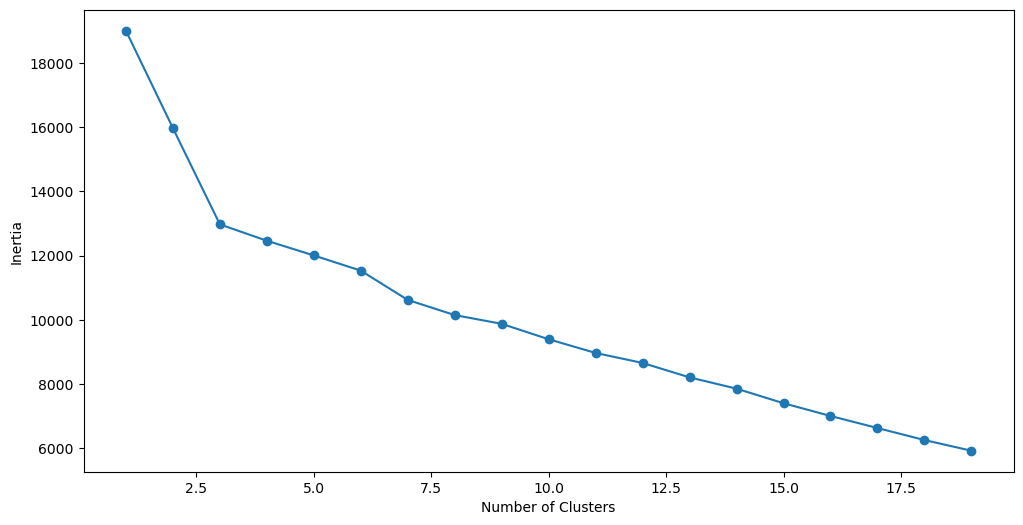

In [66]:
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster': range(1, 20), 'SSE': SSE})
plt.figure(figsize=(12, 6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [67]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

1    340
4    207
0    199
3    133
2    121
Name: cluster, dtype: int64


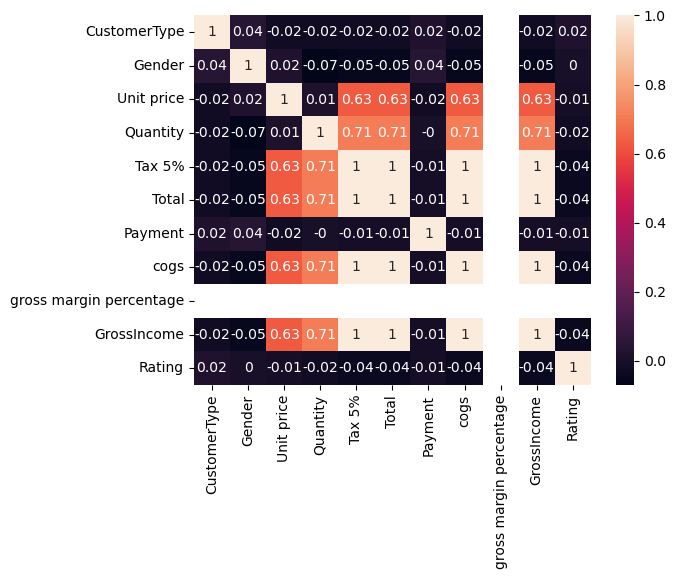

In [68]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
print(frame['cluster'].value_counts())
plt.figure(dpi=100)
sns.heatmap(np.round(data.corr(), 2), annot=True)
plt.show()

In [69]:
# Feature Scaling using Min-Max Scaler
scaler_minmax = MinMaxScaler()
data_scaled_minmax = scaler_minmax.fit_transform(data_fe.drop('Quantity', axis=1))  # Drop the target variable 'Quantity'

In [70]:
# Feature Selection using Random Forest Regressor
X_fs = pd.DataFrame(data_scaled_minmax, columns=data_fe.drop('Quantity', axis=1).columns)
y_fs = data_fe['Quantity']
rf = RandomForestRegressor()
sfm = SelectFromModel(rf, threshold=0.01)
sfm.fit(X_fs, y_fs)
selected_features = X_fs.columns[sfm.get_support()]

In [71]:
# Splitting the data with selected features
X_selected = X_fs[selected_features]
y_selected = y_fs
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y_selected, test_size=0.4, random_state=0)

In [72]:
# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train_sel, y_train_sel)
y_pred_rf = rf_model.predict(X_test_sel)

rf_train_acc = rf_model.score(X_train_sel, y_train_sel)
rf_test_acc  =rf_model.score(X_test_sel, y_pred_rf)

In [73]:
print("Training Accuracy of Random Forest", rf_train_acc)

Training Accuracy of Random Forest 0.9989234127102036


In [74]:
import numpy as np

def RMSLE(y_true, y_pred):
    return np.sqrt(np.mean(np.square(np.log1p(y_pred) - np.log1p(y_true))))


def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [75]:
# Model Evaluation for Random Forest Regressor
RF_RMSLE = round(RMSLE(y_test_sel, y_pred_rf), 4)
RF_MAPE = round(MAPE(y_test_sel, y_pred_rf) * 100, 2)
RF_CS = round(CVS(rf_model, X_selected, y_selected, cv=5).mean(), 4)

In [76]:
cross_val(rf_model, RandomForestRegressor(), X, y, 5)

MSE = [RF_RMSLE]
R_2 = [RF_MAPE]
Cross_score = [RF_CS]

Models = pd.DataFrame({
    'models': ["Random Forest"],
    'MSE': MSE, 'R^2': R_2, 'Cross Validation Score': Cross_score})

RandomForestRegressor() Scores:
99.03 %
99.07 %
99.11 %
99.34 %
98.2 %
Average RandomForestRegressor() score: 98.9502 %


In [77]:
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train_sel, y_train_sel)
y_pred_gb = gb_model.predict(X_test_sel)

In [78]:
gb_train_acc = gb_model.score(X_train_sel, y_train_sel)
gb_test_acc  = gb_model.score(X_test_sel, y_pred_gb)

In [79]:
print("Training Accuracy of Random Forest", gb_train_acc)

Training Accuracy of Random Forest 0.9957530345048149


In [80]:
# Model Evaluation for Gradient Boosting Regressor
GB_RMSLE = round(RMSLE(y_test_sel, y_pred_gb), 4)
GB_MAPE = round(MAPE(y_test_sel, y_pred_gb) * 100, 2)
GB_CS = round(CVS(gb_model, X_selected, y_selected, cv=5).mean(), 4)

In [81]:
cross_val(gb_model, GradientBoostingRegressor(), X, y, 5)

MSE = [GB_RMSLE]
R_2 = [GB_MAPE]
Cross_score = [GB_CS]

Models = pd.DataFrame({
    'models': ["Gragient Boost"],
    'MSE': MSE, 'R^2': R_2, 'Cross Validation Score': Cross_score})

GradientBoostingRegressor() Scores:
98.6 %
98.12 %
98.72 %
99.09 %
98.74 %
Average GradientBoostingRegressor() score: 98.6524 %


In [82]:
# Hyperparameter Tuning for Random Forest Regressor
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [83]:
grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5, scoring='neg_mean_absolute_error')
grid_search_rf.fit(X_selected, y_selected)
best_rf_model = grid_search_rf.best_estimator_

# Print the best parameters
print("Best Parameters for Random Forest Regressor:", grid_search_rf.best_params_)

Best Parameters for Random Forest Regressor: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [84]:
Models = pd.DataFrame({
    'models': ["Linear Regression", "Random Forest Regressor", "Gradient Boosting Regressor"],
    'R^2': [LR_R_2, 0, 0],
    'RMSLE': [0, RF_RMSLE, GB_RMSLE],
    'MAPE': [0, RF_MAPE, GB_MAPE],
    'Cross Validation Score': [LR_CS, RF_CS, GB_CS]
})

# Display the DataFrame
print(Models.sort_values(by='RMSLE', ascending=True))

                        models     R^2   RMSLE    MAPE  Cross Validation Score
0            Linear Regression  0.8204  0.0000    0.00                  0.8086
1      Random Forest Regressor  0.0000  0.0330  252.50                  0.9929
2  Gradient Boosting Regressor  0.0000  0.0515  517.16                  0.9874


In [85]:
models = ["Linear Regression", "Random Forest", "Gradient Boosting"]
mse_values = [LR_MSE, RF_RMSLE, GB_RMSLE]
cs_values = [LR_CS, RF_CS, GB_CS]
train_values= [lr_train_acc, rf_train_acc, gb_train_acc]
test_values= [lr_test_acc, rf_test_acc, gb_test_acc]

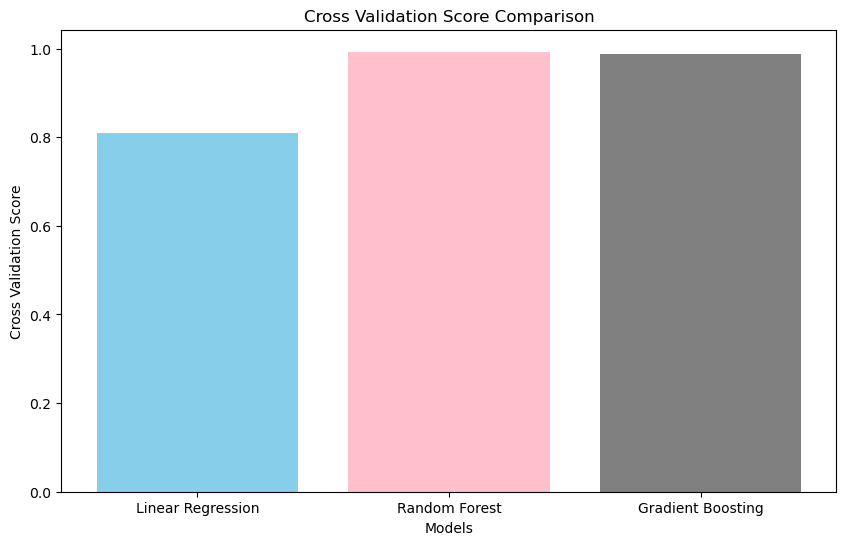

In [86]:
# Cross Validation Score(Cs) Comparison
plt.figure(figsize=(10, 6))
plt.bar(models, cs_values, color=['skyblue', 'pink', 'grey'])
plt.title('Cross Validation Score Comparison')
plt.xlabel('Models')
plt.ylabel('Cross Validation Score')
plt.show()

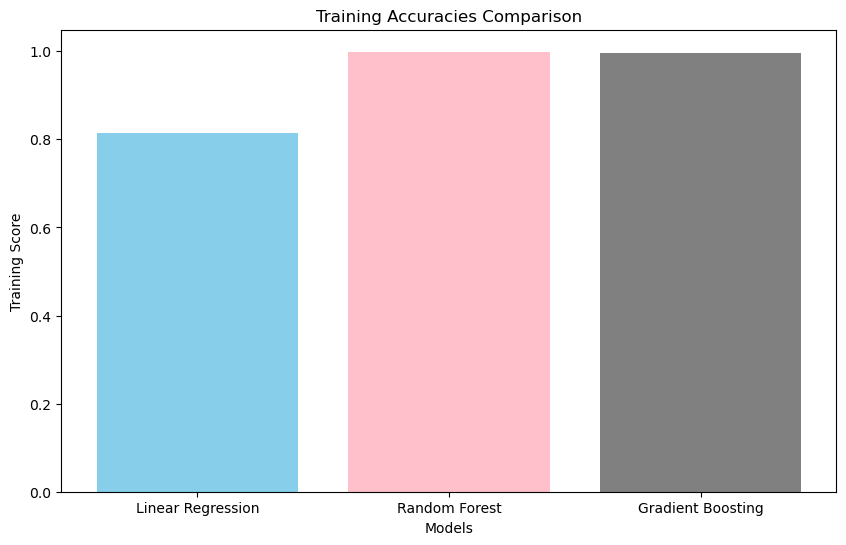

In [87]:
# Training Accuracies Comparison
plt.figure(figsize=(10, 6))
plt.bar(models, train_values, color=['skyblue', 'pink', 'grey'])
plt.title('Training Accuracies Comparison')
plt.xlabel('Models')
plt.ylabel('Training Score')
plt.show()

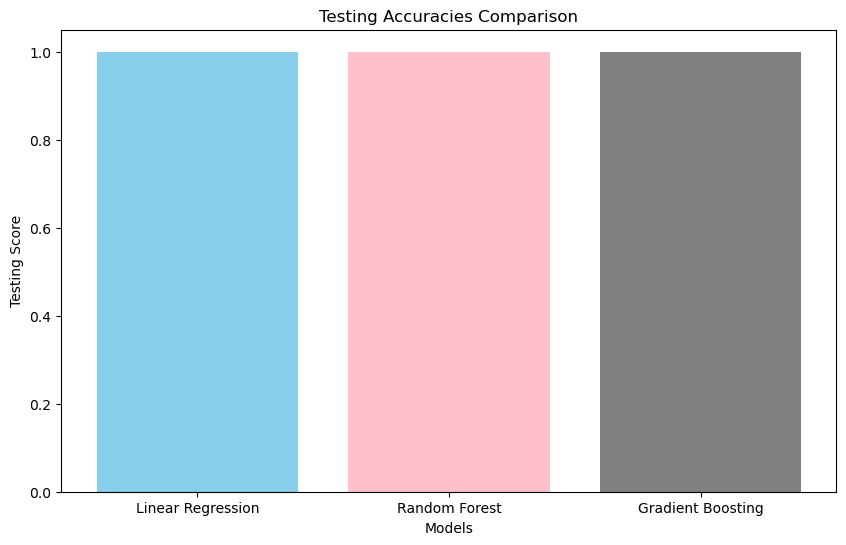

In [88]:
# Testing Accuracies Comparison
plt.figure(figsize=(10, 6))
plt.bar(models, test_values, color=['skyblue', 'pink', 'grey'])
plt.title('Testing Accuracies Comparison')
plt.xlabel('Models')
plt.ylabel('Testing Score')
plt.show()